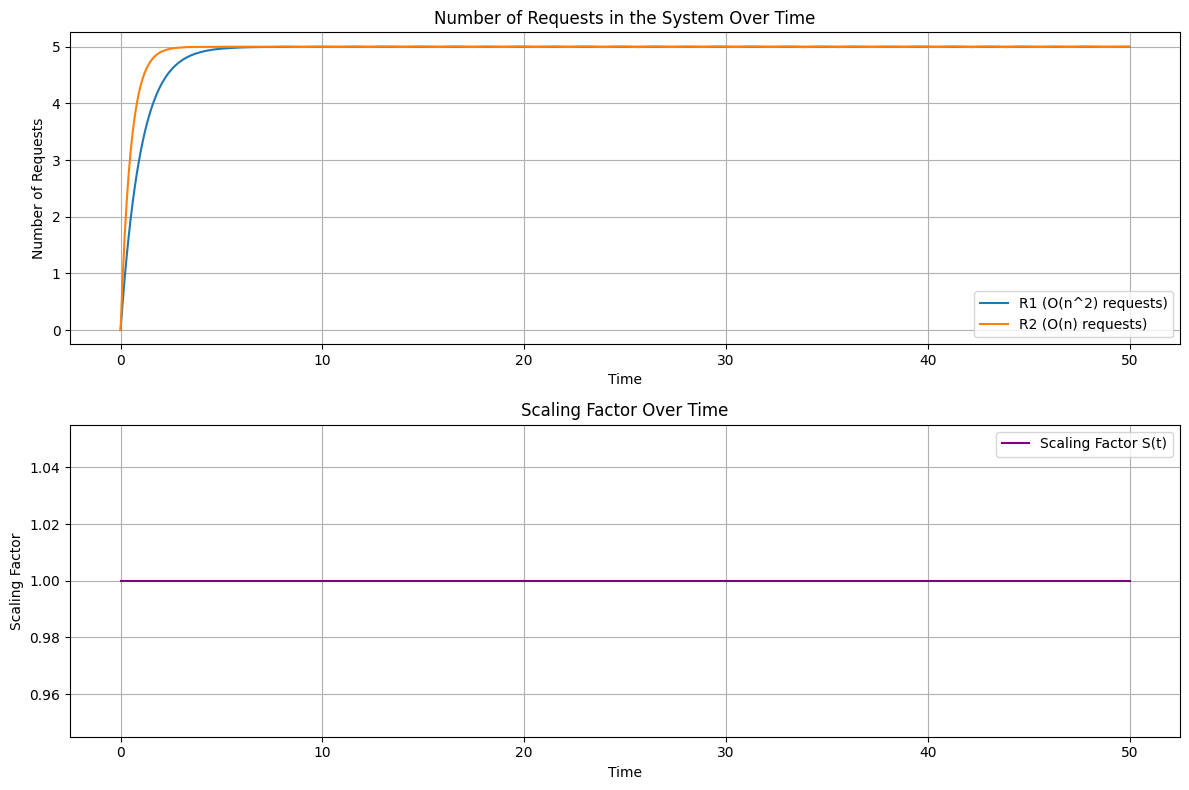

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define model parameters
E1 = 2.0  # Computational effort per request for O(n^2) algorithm
E2 = 1.0  # Computational effort per request for O(n) algorithm
C = 100.0  # Total available compute capacity

T1_0 = 1.0  # Base processing time per request for O(n^2) algorithm
T2_0 = 0.5  # Base processing time per request for O(n) algorithm

# Define arrival rates (could be constants or functions of time)
# For this simulation, we'll assume constant arrival rates
lambda1 = 5.0  # Arrival rate for O(n^2) requests
lambda2 = 10.0  # Arrival rate for O(n) requests


# Define the system of differential equations
def system(t, R):
    R1, R2 = R

    # Compute demand
    D = R1 * E1 + R2 * E2

    # Scaling factor
    S = max(1.0, D / C)

    # Processing times
    T1 = T1_0 * S
    T2 = T2_0 * S

    # Processing rates
    mu1 = R1 / T1 if T1 > 0 else 0.0
    mu2 = R2 / T2 if T2 > 0 else 0.0

    # Differential equations
    dR1_dt = lambda1 - mu1
    dR2_dt = lambda2 - mu2

    return [dR1_dt, dR2_dt]


# Time span for simulation
t_span = (0, 50)  # From time t=0 to t=50
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Time points to evaluate

# Initial conditions: starting with zero requests in the system
R0 = [0.0, 0.0]

# Solve the differential equations
sol = solve_ivp(system, t_span, R0, t_eval=t_eval)

# Extract solutions
R1 = sol.y[0]  # Number of O(n^2) requests over time
R2 = sol.y[1]  # Number of O(n) requests over time

# Compute additional variables for plotting
D = E1 * R1 + E2 * R2  # Compute demand over time
S = np.maximum(1.0, D / C)  # Scaling factor over time

# Plot the results
plt.figure(figsize=(12, 8))

# Plot number of requests in the system
plt.subplot(2, 1, 1)
plt.plot(sol.t, R1, label="R1 (O(n^2) requests)")
plt.plot(sol.t, R2, label="R2 (O(n) requests)")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.title("Number of Requests in the System Over Time")
plt.legend()
plt.grid(True)

# Plot scaling factor S(t)
plt.subplot(2, 1, 2)
plt.plot(sol.t, S, label="Scaling Factor S(t)", color="purple")
plt.xlabel("Time")
plt.ylabel("Scaling Factor")
plt.title("Scaling Factor Over Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

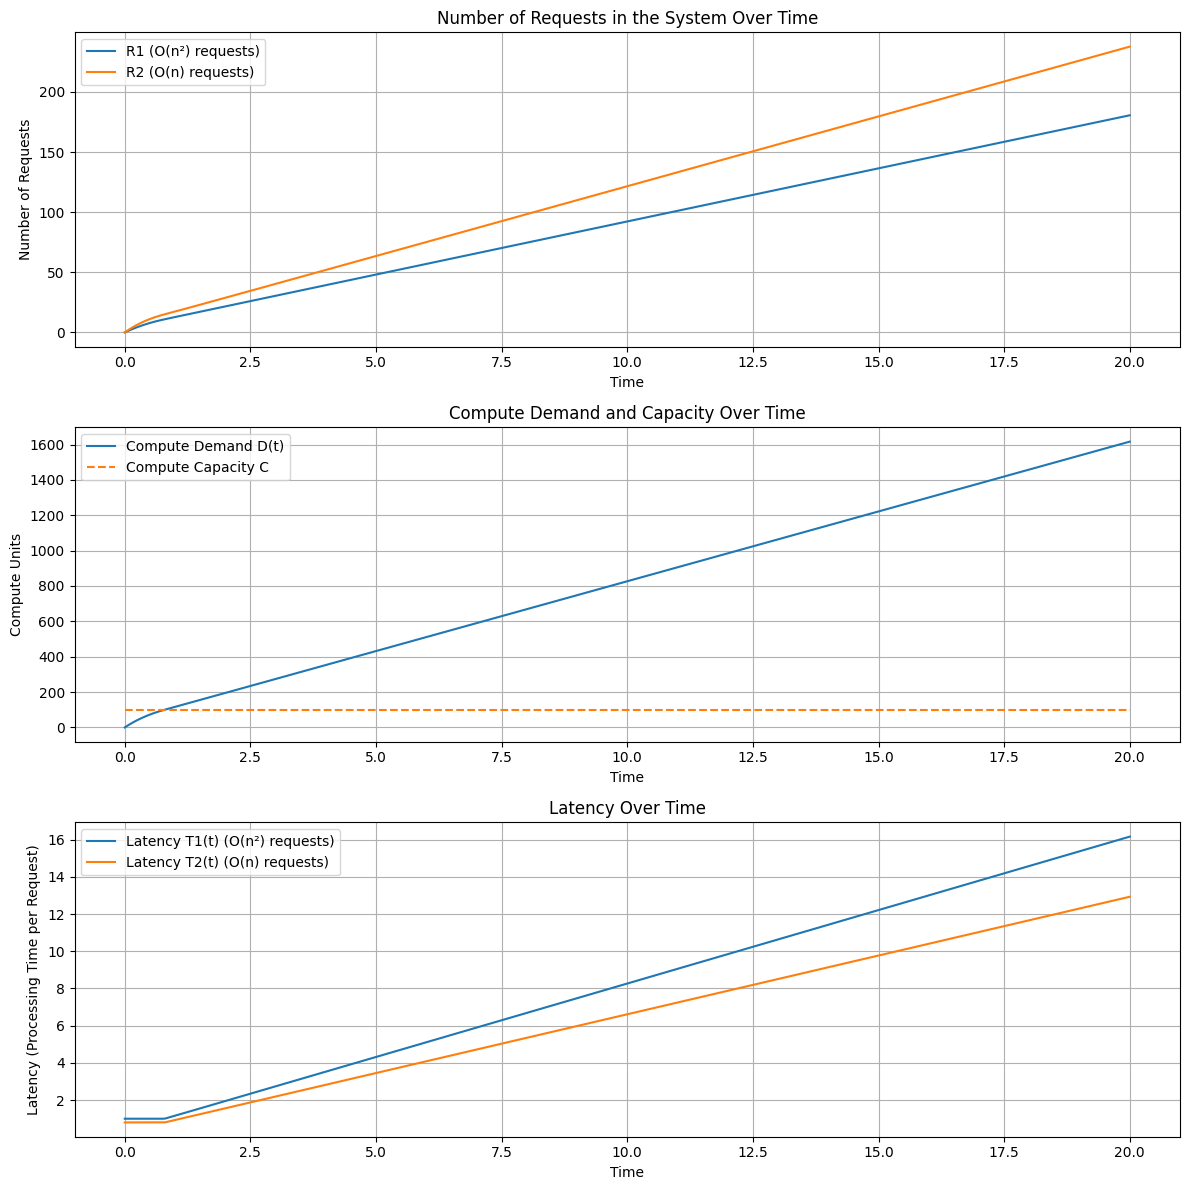

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define model parameters
E1 = 5.0  # Computational effort per request for O(n^2) algorithm
E2 = 3.0  # Computational effort per request for O(n) algorithm
C = 100.0  # Total available compute capacity

T1_0 = 1.0  # Base processing time per request for O(n^2) algorithm
T2_0 = 0.8  # Base processing time per request for O(n) algorithm

# Adjusted arrival rates to increase system load
lambda1 = 20.0  # Arrival rate for O(n^2) requests
lambda2 = 30.0  # Arrival rate for O(n) requests


# Define the system of differential equations
def system(t, R):
    R1, R2 = R

    # Compute demand
    D = R1 * E1 + R2 * E2

    # Scaling factor
    S = max(1.0, D / C)

    # Processing times (latencies)
    T1 = T1_0 * S
    T2 = T2_0 * S

    # Processing rates
    mu1 = R1 / T1 if T1 > 0 else 0.0
    mu2 = R2 / T2 if T2 > 0 else 0.0

    # Differential equations
    dR1_dt = lambda1 - mu1
    dR2_dt = lambda2 - mu2

    return [dR1_dt, dR2_dt]


# Time span for simulation
t_span = (0, 20)  # From time t=0 to t=20
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Time points to evaluate

# Initial conditions: starting with zero requests in the system
R0 = [0.0, 0.0]

# Solve the differential equations
sol = solve_ivp(system, t_span, R0, t_eval=t_eval)

# Extract solutions
R1 = sol.y[0]  # Number of O(n^2) requests over time
R2 = sol.y[1]  # Number of O(n) requests over time

# Compute additional variables for plotting
D = E1 * R1 + E2 * R2  # Compute demand over time
C_array = C * np.ones_like(D)  # Compute capacity over time
S = np.maximum(1.0, D / C)  # Scaling factor over time

# Processing times (latencies)
T1 = T1_0 * S
T2 = T2_0 * S

# Plot the results
plt.figure(figsize=(12, 12))

# Plot number of requests in the system
plt.subplot(3, 1, 1)
plt.plot(sol.t, R1, label="R1 (O(n²) requests)")
plt.plot(sol.t, R2, label="R2 (O(n) requests)")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.title("Number of Requests in the System Over Time")
plt.legend()
plt.grid(True)

# Plot compute demand and capacity
plt.subplot(3, 1, 2)
plt.plot(sol.t, D, label="Compute Demand D(t)")
plt.plot(sol.t, C_array, label="Compute Capacity C", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Compute Units")
plt.title("Compute Demand and Capacity Over Time")
plt.legend()
plt.grid(True)

# Plot latencies
plt.subplot(3, 1, 3)
plt.plot(sol.t, T1, label="Latency T1(t) (O(n²) requests)")
plt.plot(sol.t, T2, label="Latency T2(t) (O(n) requests)")
plt.xlabel("Time")
plt.ylabel("Latency (Processing Time per Request)")
plt.title("Latency Over Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

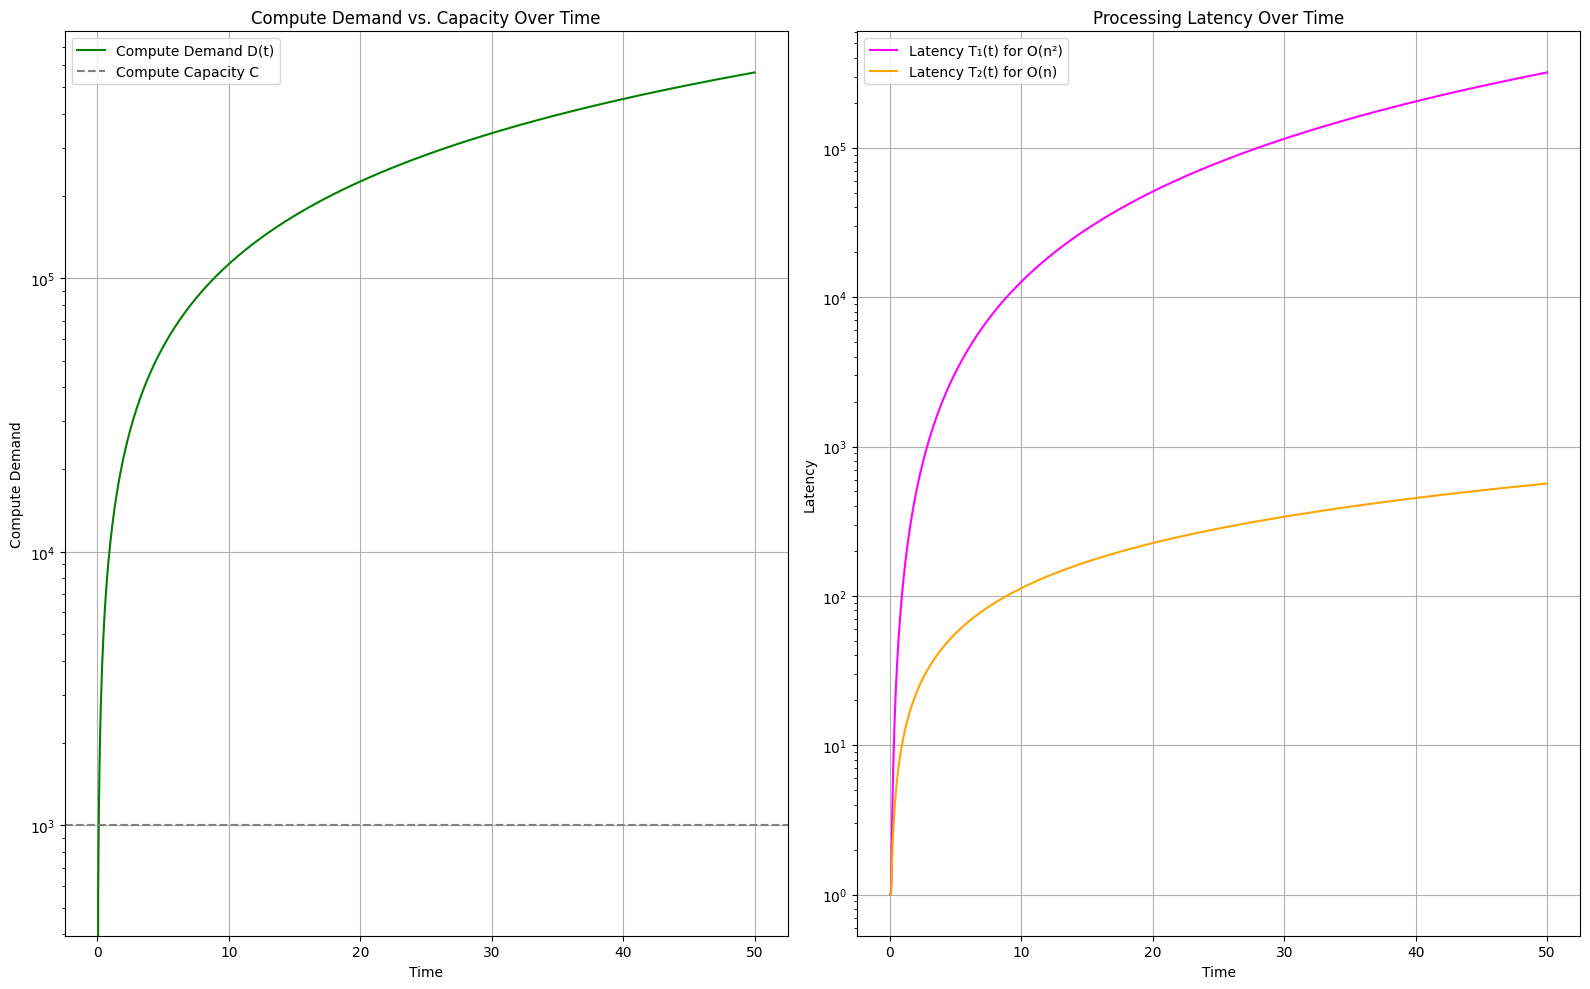

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define model parameters
E1_coefficient = 1.0  # Coefficient for O(n^2) algorithm
E2_coefficient = 1.0  # Coefficient for O(n) algorithm

mu_n = 10.0  # Mean of request size n
sigma_n = 2.0  # Standard deviation of request size n

E1_avg = E1_coefficient * (mu_n**2 + sigma_n**2)  # Expected E1 per request
E2_avg = E2_coefficient * mu_n  # Expected E2 per request

C = 1000.0  # Total compute capacity (computational units per unit time)

T1_0 = 1.0  # Base processing time for O(n^2) algorithm (when S(t)=1)
T2_0 = 1.0  # Base processing time for O(n) algorithm (when S(t)=1)

# Define arrival rates (constant for simplicity)
lambda1 = 100.0  # Arrival rate for O(n^2) requests
lambda2 = 100.0  # Arrival rate for O(n) requests


# Define the system of differential equations
def system(t, R):
    R1, R2 = R

    # Compute demand
    D = R1 * E1_avg + R2 * E2_avg

    # Scaling factor
    S = D / C if D > C else 1.0

    # Processing times with different scaling
    T1 = T1_0 * S**2  # Quadratic scaling for O(n^2)
    T2 = T2_0 * S  # Linear scaling for O(n)

    # Compute processing rates
    mu1 = R1 / T1 if T1 > 0 else 0.0
    mu2 = R2 / T2 if T2 > 0 else 0.0

    # Differential equations
    dR1_dt = lambda1 - mu1
    dR2_dt = lambda2 - mu2

    return [dR1_dt, dR2_dt]


# Time span for simulation
t_start = 0
t_end = 50
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Initial conditions: starting with zero requests
R0 = [0.0, 0.0]

# Solve the differential equations
sol = solve_ivp(system, [t_start, t_end], R0, t_eval=t_eval, method="RK45")

# Extract solutions
R1 = sol.y[0]  # Number of O(n^2) requests over time
R2 = sol.y[1]  # Number of O(n) requests over time
time = sol.t

# Compute additional variables
D = E1_avg * R1 + E2_avg * R2  # Compute demand over time
S = np.maximum(1.0, D / C)  # Scaling factor over time
T1 = T1_0 * S**2  # Latency for O(n^2) over time
T2 = T2_0 * S  # Latency for O(n) over time
mu1 = R1 / T1  # Processing rate for O(n^2)
mu2 = R2 / T2  # Processing rate for O(n)

# Plotting the results
plt.figure(figsize=(16, 10))

# Plot compute demand and capacity
plt.subplot(1, 2, 1)
plt.plot(time, D, label="Compute Demand D(t)", color="green")
plt.axhline(y=C, color="gray", linestyle="--", label="Compute Capacity C")
plt.xlabel("Time")
plt.ylabel("Compute Demand")
plt.title("Compute Demand vs. Capacity Over Time")
plt.legend()
plt.semilogy()
plt.grid(True)

# Plot latency for both algorithms
plt.subplot(1, 2, 2)
plt.plot(time, T1, label="Latency T₁(t) for O(n²)", color="magenta")
plt.plot(time, T2, label="Latency T₂(t) for O(n)", color="orange")
plt.xlabel("Time")
plt.ylabel("Latency")
plt.title("Processing Latency Over Time")
plt.legend()
plt.semilogy()
plt.grid(True)

plt.tight_layout()
plt.show()

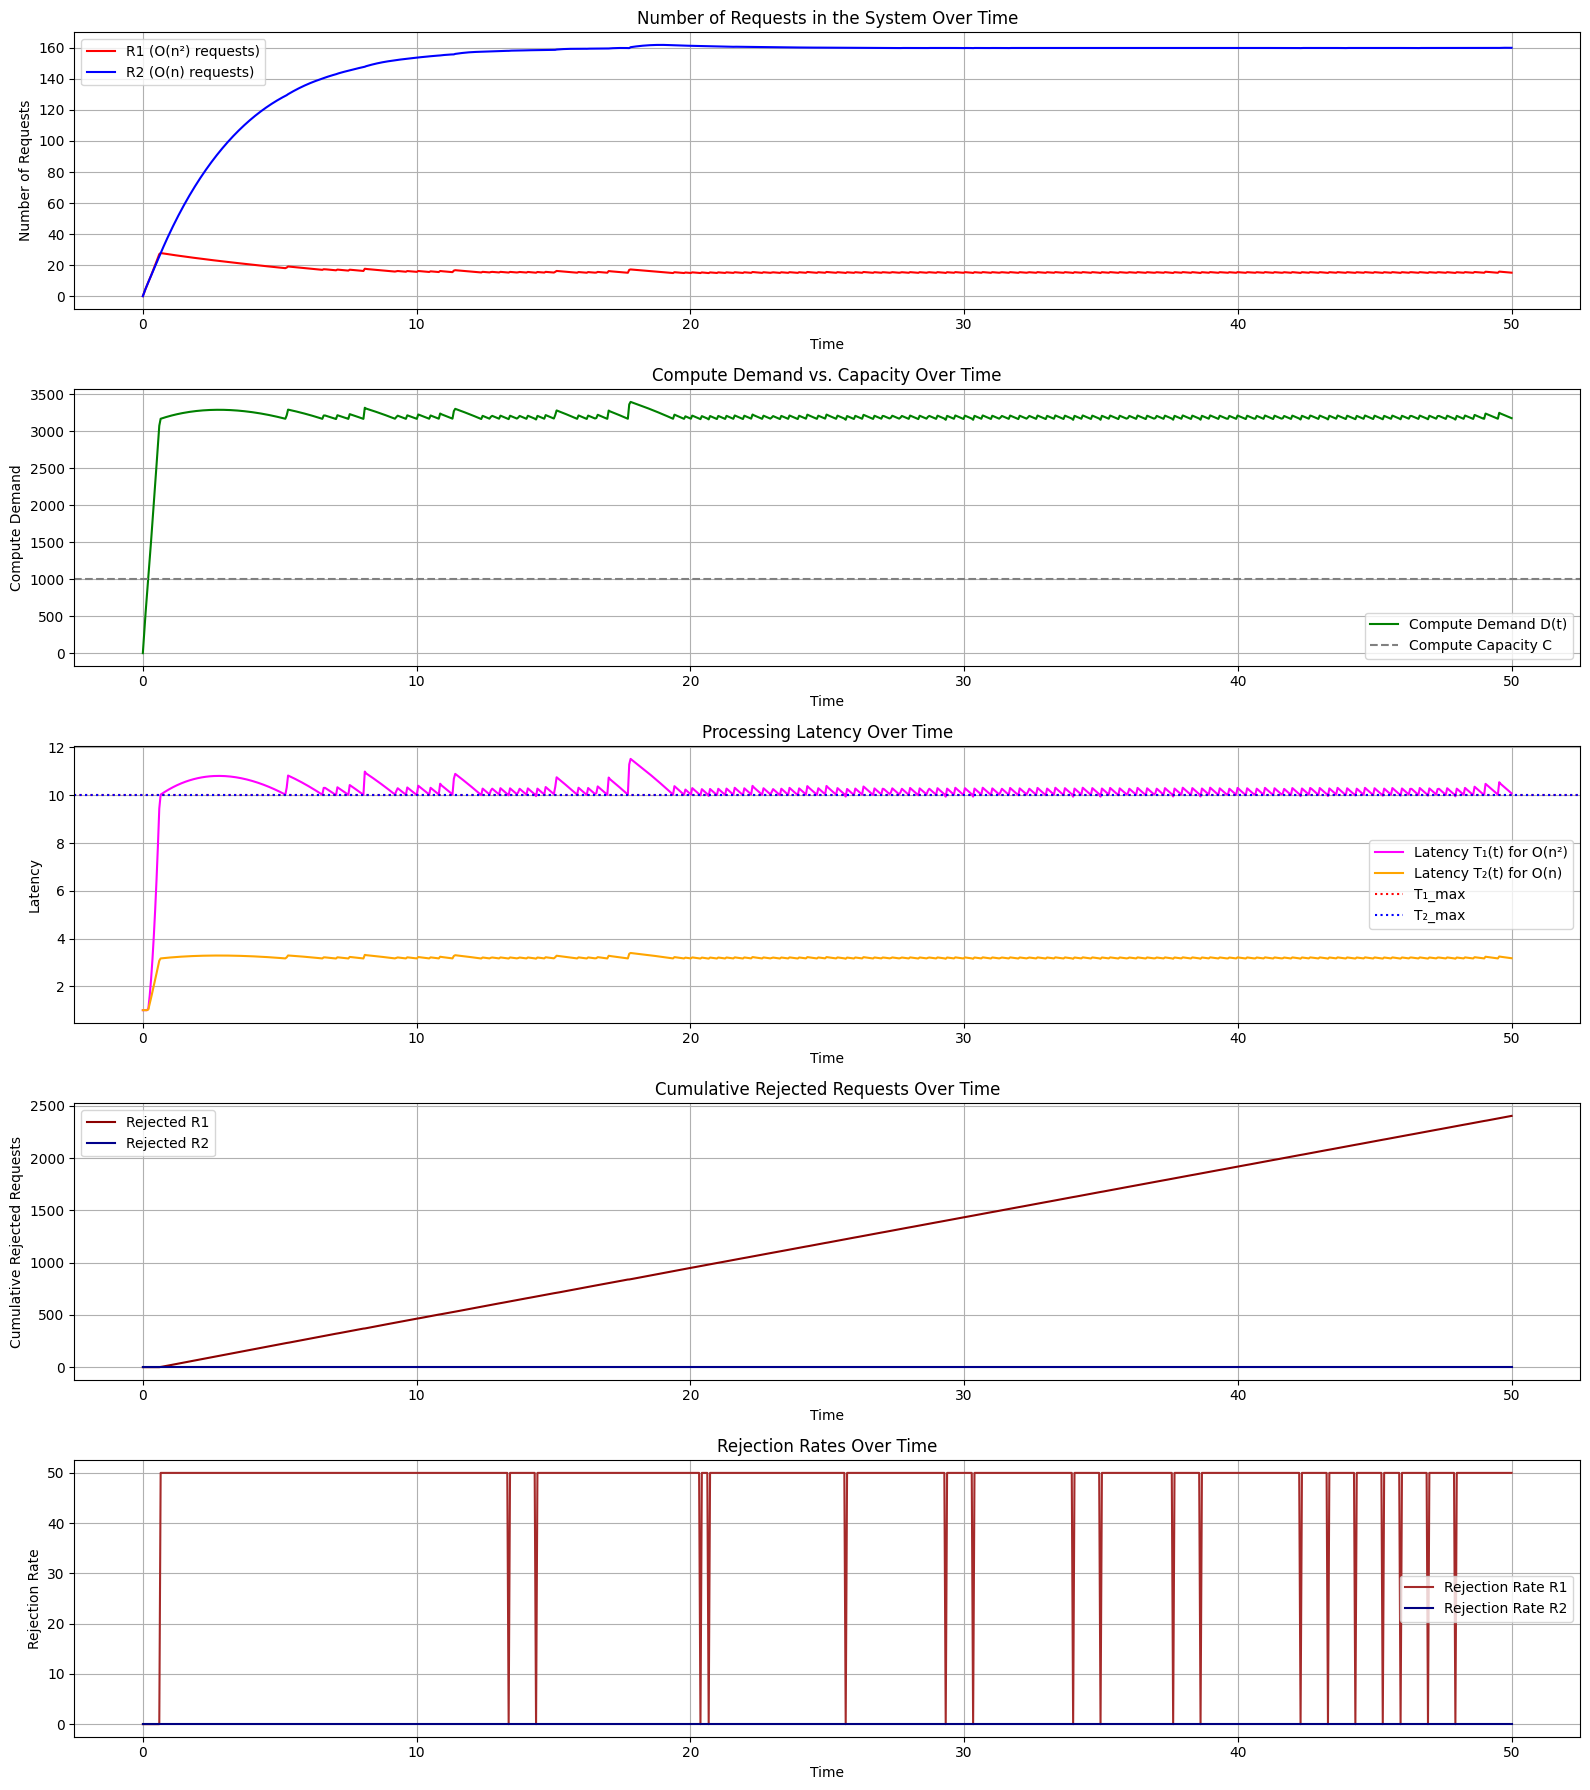

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define model parameters
E1_coefficient = 1.0  # Coefficient for O(n^2) algorithm
E2_coefficient = 1.0  # Coefficient for O(n) algorithm

mu_n = 10.0       # Mean of request size n
sigma_n = 2.0     # Standard deviation of request size n

E1_avg = E1_coefficient * (mu_n**2 + sigma_n**2)  # Expected E1 per request
E2_avg = E2_coefficient * mu_n                    # Expected E2 per request

C = 1000.0  # Total compute capacity (computational units per unit time)

T1_0 = 1.0  # Base processing time for O(n^2) algorithm (when S(t)=1)
T2_0 = 1.0  # Base processing time for O(n) algorithm (when S(t)=1)

# Define arrival rates (constant for simplicity)
lambda1 = 50.0    # Arrival rate for O(n^2) requests
lambda2 = 50.0   # Arrival rate for O(n) requests

# Define latency thresholds
T1_max = 10.0  # Maximum acceptable latency for O(n^2)
T2_max = 10.0   # Maximum acceptable latency for O(n)

# Define the system of differential equations
def system(t, R):
    R1, R2, Rrej1, Rrej2 = R  # Unpack current state
    
    # Compute demand
    D = R1 * E1_avg + R2 * E2_avg
    
    # Scaling factor
    S = D / C if D > C else 1.0
    
    # Processing times with different scaling
    T1 = T1_0 * S**2  # Quadratic scaling for O(n^2)
    T2 = T2_0 * S      # Linear scaling for O(n)
    
    # Determine effective arrival rates based on latency thresholds
    if T1 <= T1_max:
        lambda1_eff = lambda1
    else:
        lambda1_eff = 0.0  # Reject all incoming O(n^2) requests
    
    if T2 <= T2_max:
        lambda2_eff = lambda2
    else:
        lambda2_eff = 0.0  # Reject all incoming O(n) requests
    
    # Compute processing rates
    mu1 = R1 / T1 if T1 > 0 else 0.0
    mu2 = R2 / T2 if T2 > 0 else 0.0
    
    # Differential equations
    dR1_dt = lambda1_eff - mu1
    dR2_dt = lambda2_eff - mu2
    dRrej1_dt = lambda1 - lambda1_eff  # Rejected O(n^2) requests
    dRrej2_dt = lambda2 - lambda2_eff  # Rejected O(n) requests
    
    return [dR1_dt, dR2_dt, dRrej1_dt, dRrej2_dt]

# Time span for simulation
t_start = 0
t_end = 50
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Initial conditions: starting with zero requests and zero rejections
R0 = [0.0, 0.0, 0.0, 0.0]

# Solve the differential equations
sol = solve_ivp(system, [t_start, t_end], R0, t_eval=t_eval, method='RK45')

# Extract solutions
R1 = sol.y[0]       # Number of O(n^2) requests over time
R2 = sol.y[1]       # Number of O(n) requests over time
Rrej1 = sol.y[2]    # Cumulative rejected O(n^2) requests
Rrej2 = sol.y[3]    # Cumulative rejected O(n) requests
time = sol.t

# Compute additional variables
D = E1_avg * R1 + E2_avg * R2                # Compute demand over time
S = np.maximum(1.0, D / C)                   # Scaling factor over time
T1 = T1_0 * S**2                             # Latency for O(n^2) over time
T2 = T2_0 * S                                # Latency for O(n) over time
mu1 = R1 / T1                                # Processing rate for O(n^2)
mu2 = R2 / T2                                # Processing rate for O(n)

# Compute rejection rates (instantaneous)
rej_rate1 = np.where(T1 <= T1_max, 0.0, lambda1)
rej_rate2 = np.where(T2 <= T2_max, 0.0, lambda2)

# Plotting the results
plt.figure(figsize=(16, 18))

# Plot number of requests in the system
plt.subplot(5, 1, 1)
plt.plot(time, R1, label='R1 (O(n²) requests)', color='red')
plt.plot(time, R2, label='R2 (O(n) requests)', color='blue')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.title('Number of Requests in the System Over Time')
plt.legend()
plt.grid(True)

# Plot compute demand and capacity
plt.subplot(5, 1, 2)
plt.plot(time, D, label='Compute Demand D(t)', color='green')
plt.axhline(y=C, color='gray', linestyle='--', label='Compute Capacity C')
plt.xlabel('Time')
plt.ylabel('Compute Demand')
plt.title('Compute Demand vs. Capacity Over Time')
plt.legend()
plt.grid(True)

# Plot latency for both algorithms
plt.subplot(5, 1, 3)
plt.plot(time, T1, label='Latency T₁(t) for O(n²)', color='magenta')
plt.plot(time, T2, label='Latency T₂(t) for O(n)', color='orange')
plt.axhline(y=T1_max, color='red', linestyle=':', label='T₁_max')
plt.axhline(y=T2_max, color='blue', linestyle=':', label='T₂_max')
plt.xlabel('Time')
plt.ylabel('Latency')
plt.title('Processing Latency Over Time')
plt.legend()
plt.grid(True)

# Plot cumulative rejected requests
plt.subplot(5, 1, 4)
plt.plot(time, Rrej1, label='Rejected R1', color='darkred')
plt.plot(time, Rrej2, label='Rejected R2', color='darkblue')
plt.xlabel('Time')
plt.ylabel('Cumulative Rejected Requests')
plt.title('Cumulative Rejected Requests Over Time')
plt.legend()
plt.grid(True)

# Plot rejection rates over time
plt.subplot(5, 1, 5)
plt.plot(time, np.where(T1 <= T1_max, 0, rej_rate1), label='Rejection Rate R1', color='brown')
plt.plot(time, np.where(T2 <= T2_max, 0, rej_rate2), label='Rejection Rate R2', color='navy')
plt.xlabel('Time')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()